# DIP Lab 5: Bit Plane Slicing

### Task 1: Negative Of Image
The negative of an image with grey levels in the range [0, L-1] is obtained by the negative transformation shown below:

$$s = L-1-r$$

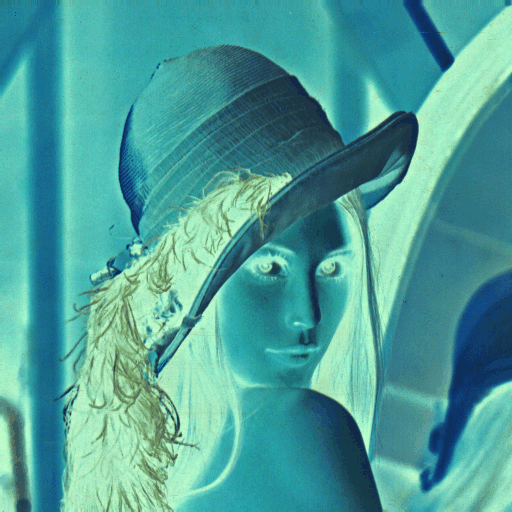

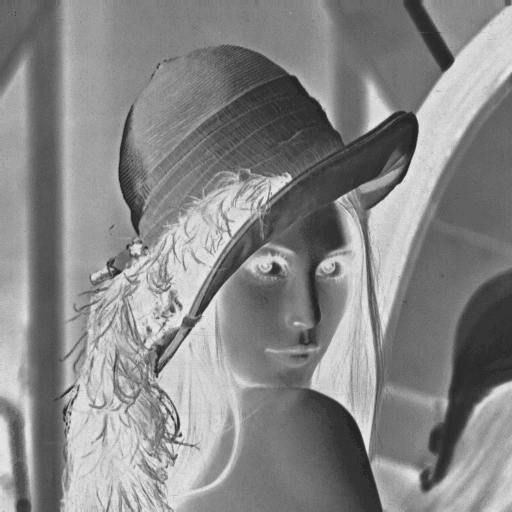

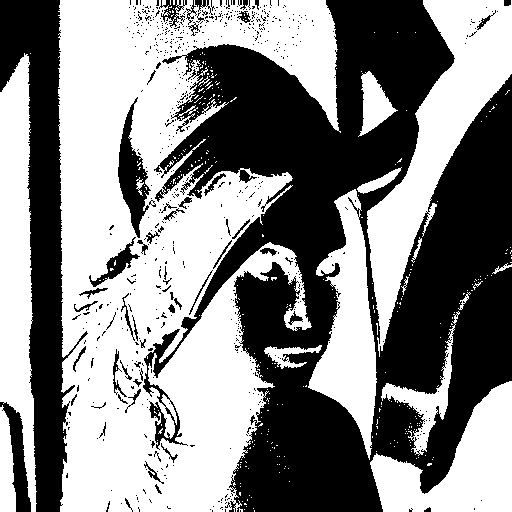

In [20]:
from PIL import Image
from IPython.display import display

def image_negative(image):
    width, height = image.size
    for x in range(0, width):
        for y in range(0, height):
            pixel = image.getpixel((x,y))
            pixel = (lambda x: x if type(x) is tuple else (x,))(pixel)
            pixel = tuple(255 - x for x in pixel)
            image.putpixel((x,y),pixel)
    return image

# Open Images
image = Image.open("lena_color.gif").convert(mode="RGB")
image_greyscale = image.convert('L')
image_binary = image_greyscale.point(lambda x : 255 if x > 127 else 0, mode='1')

# Take Image Negatives
display(image_negative(image),image_negative(image_greyscale),image_negative(image_binary))

### Task 2: Horizontal Gradient Image

The horizontal gradient image is used to detect vertical edges in the image. The horizontal gradient is calculated as follows:

$$I(x,y) = I (x,y+1) - I (x,y-1)$$

The values of I are then renormalized as it contains negative values. The renormalization is done as follows:

$$\left [ \frac{I(x,y) - I_{min}}{I_{max} - I_{max}} \times 255 \right ] \rightarrow I(x,y)$$

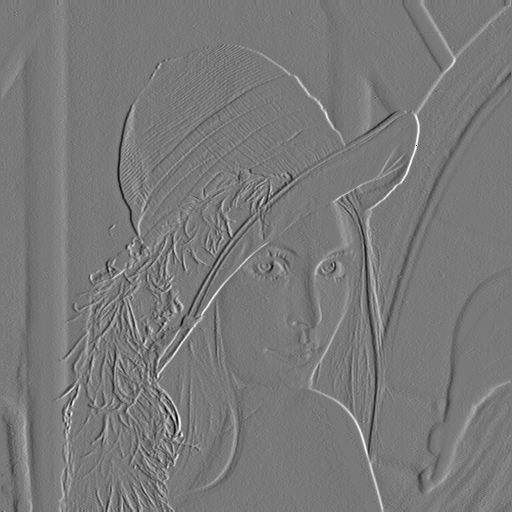

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# Convert to Greyscale
image = Image.open("lena_color.gif").convert('L')
width, height = image.size

# Convert Image to Numpy array
image_array = np.array(image, np.int32)
horizontal_gradient = np.zeros((width, height), np.int32)

# Horizontal Gradient Image Algorithm
for x in range(0, width):
    for y in range(1, height-1):
        horizontal_gradient[x,y] = image_array[x,y + 1] - image_array[x, y - 1]

max_value = np.max(horizontal_gradient)
min_value = np.min(horizontal_gradient)
difference_value = max_value - min_value

for x in range(0, width):
    for y in range(0, height):
        horizontal_gradient[x,y] = np.round(((horizontal_gradient[x,y] - min_value) / difference_value) * 255)

# Display Image
horizontal_gradient = (horizontal_gradient * 255).astype(np.uint8)
display(Image.fromarray(horizontal_gradient))

### Task 3: Bit Slicing

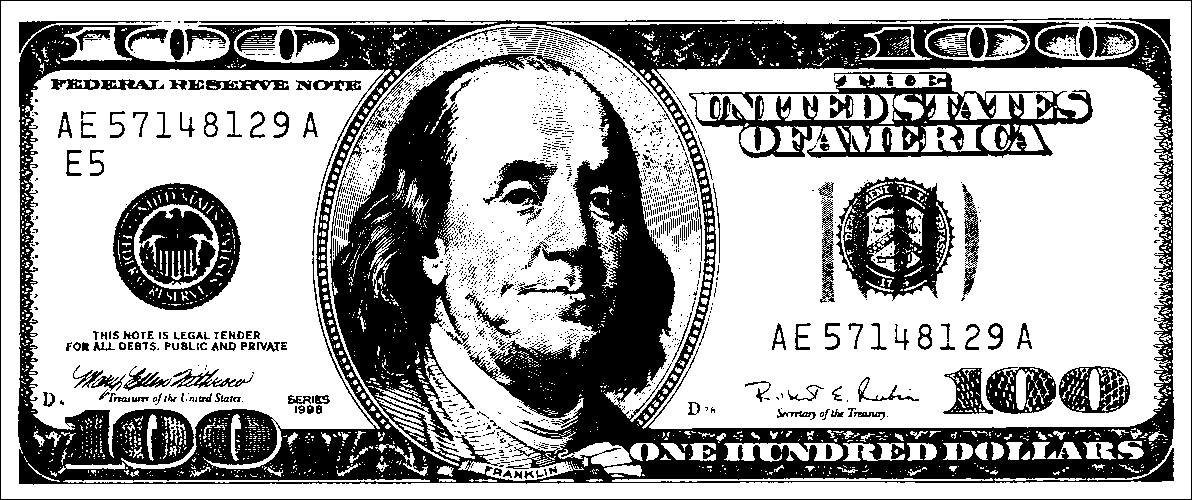

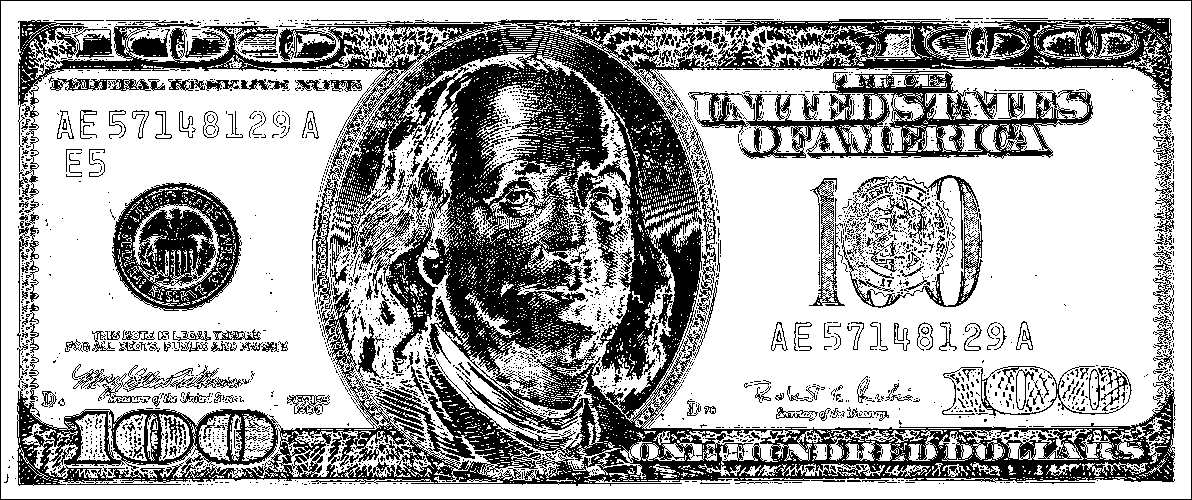

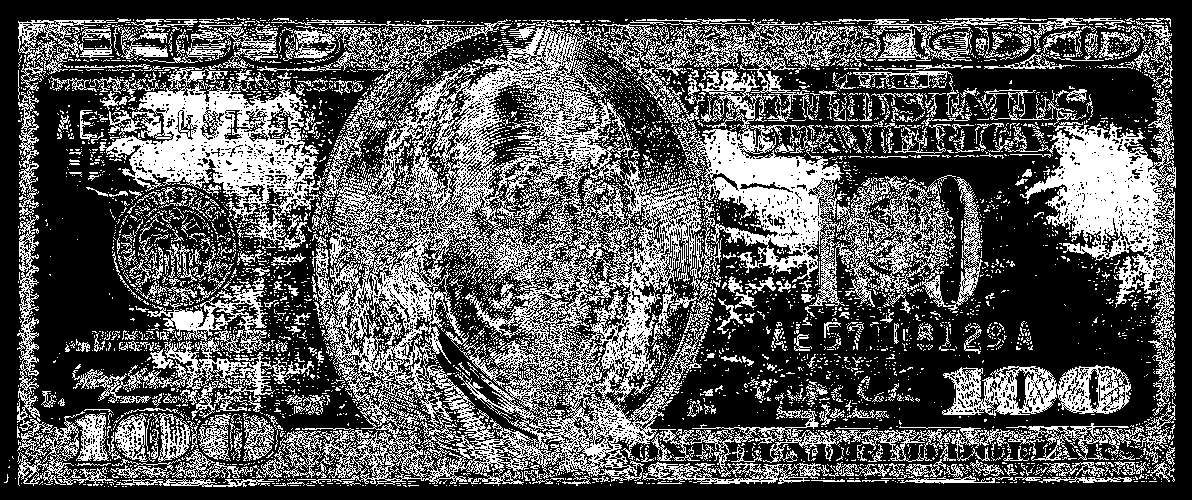

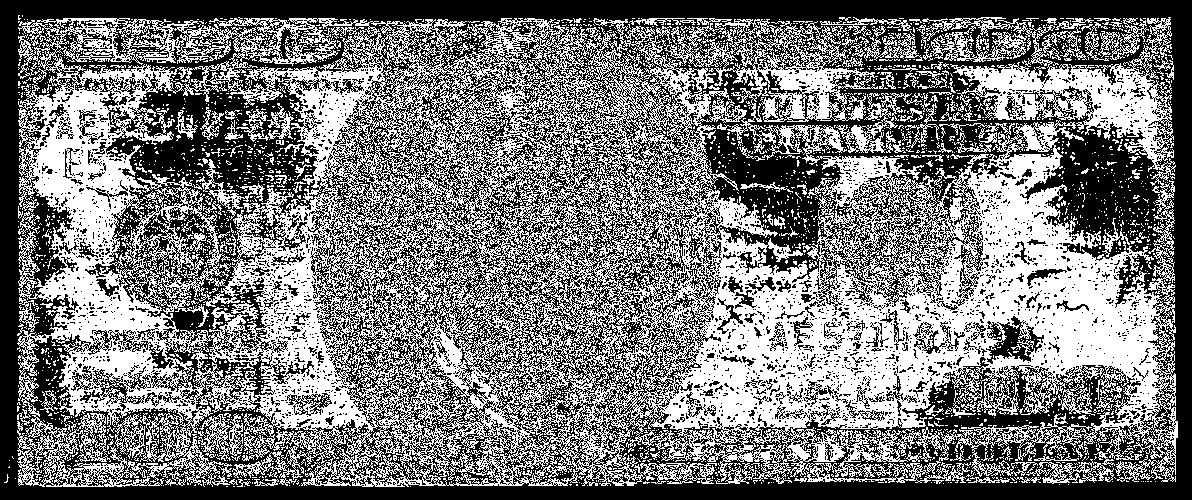

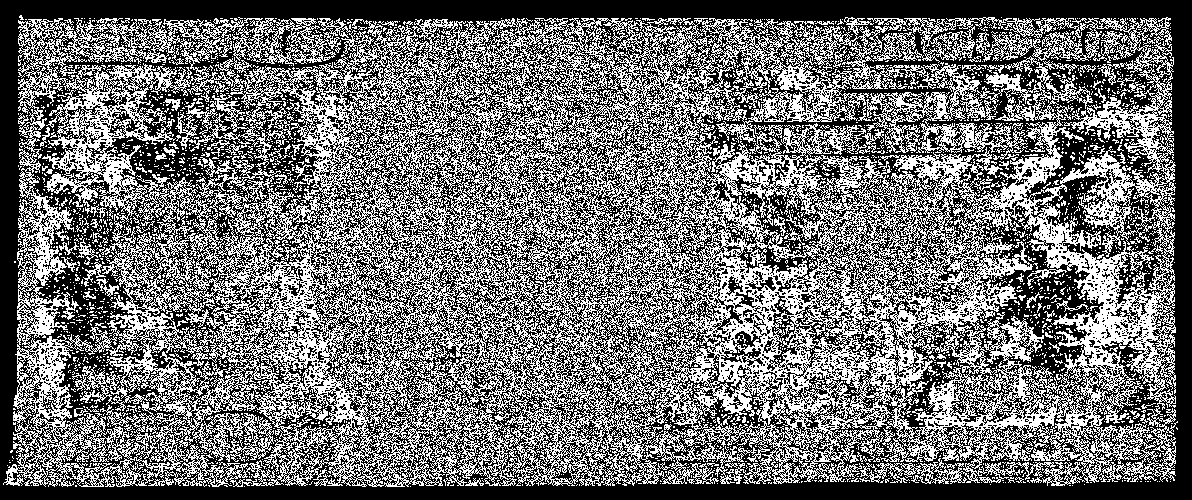

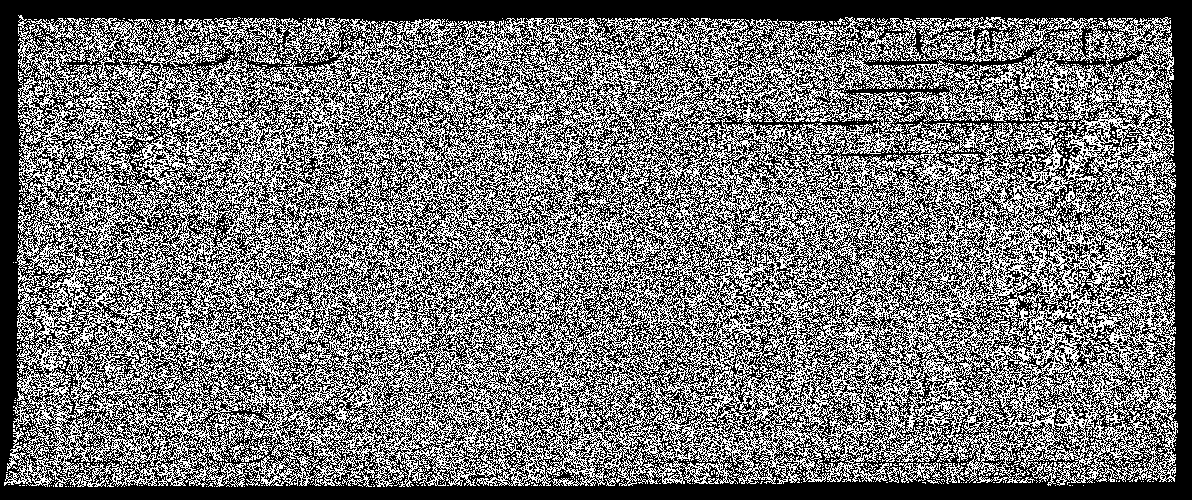

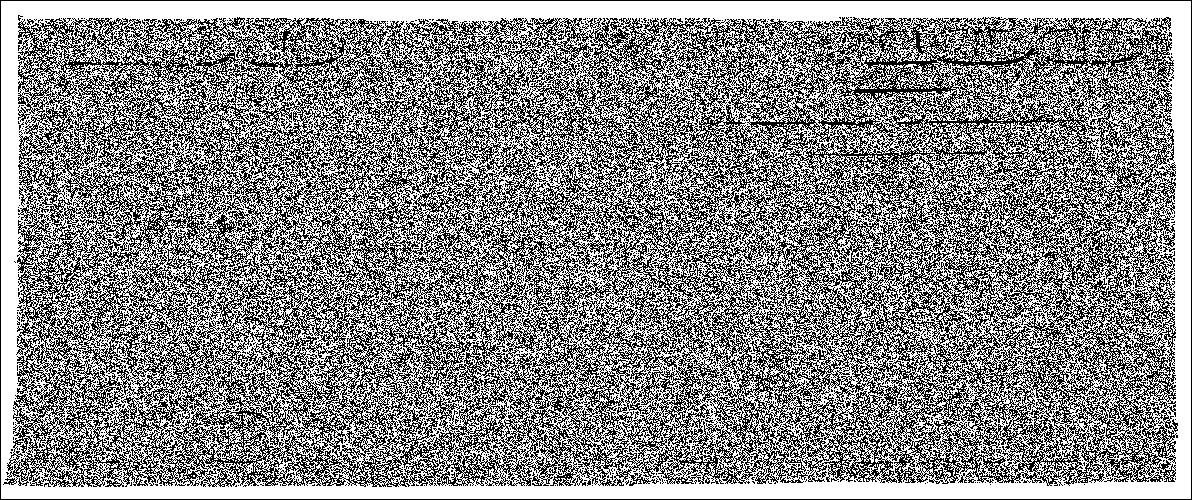

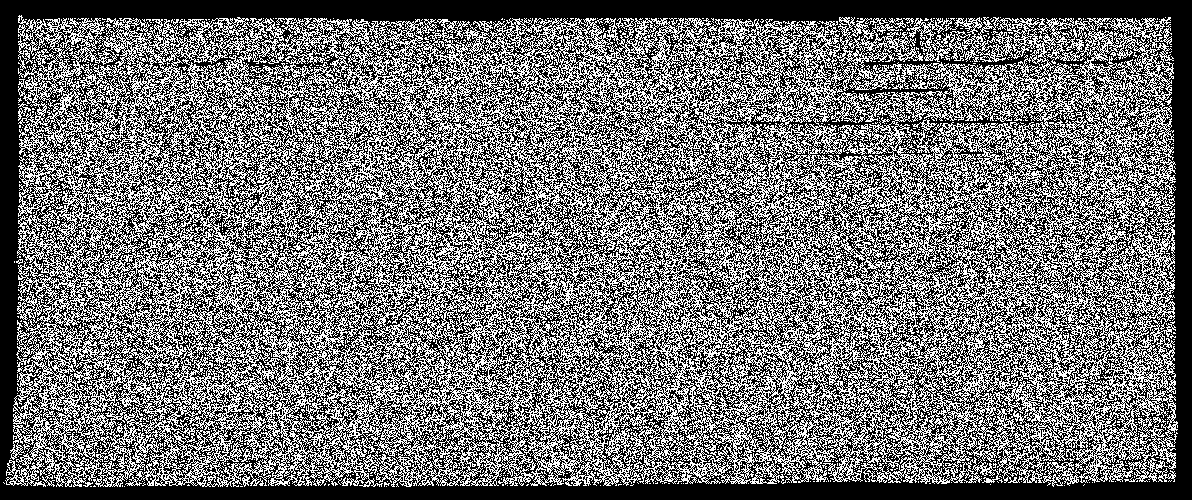

In [22]:
# Bit Plane Slicing
def bit_plane_slicing(image, bit_plane):
    bit_plane_image = Image.new('L',image.size)
    width, height = image.size
    for x in range(0, width):
        for y in range(0, height):
            pixel = image.getpixel((x,y))
            pixel = '{0:08b}'.format(pixel)
            pixel_bit = int(pixel[7-bit_plane]) * 255
            bit_plane_image.putpixel((x,y),(pixel_bit))
    return bit_plane_image

image = Image.open("dollar.tif").convert(mode="RGB").convert('L')

display(bit_plane_slicing(image, 7))
display(bit_plane_slicing(image, 6))
display(bit_plane_slicing(image, 5))
display(bit_plane_slicing(image, 4))
display(bit_plane_slicing(image, 3))
display(bit_plane_slicing(image, 2))
display(bit_plane_slicing(image, 1))
display(bit_plane_slicing(image, 0))